## Constructing the networks

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from operator import itemgetter

In [2]:
import requests
from io import BytesIO

In [3]:
url = 'https://raw.githubusercontent.com/tianzhhai/urban_simulation/main/london.graph'

response = requests.get(url)
file_object = BytesIO(response.content)
G = nx.read_graphml(file_object)

In [4]:
type(G)

networkx.classes.graph.Graph

In [5]:
print(G.number_of_nodes())
print(G.number_of_edges())

401
467


In [6]:
# To check node attributes:
list(G.nodes(data = True))[0]

('Wembley Park', {'coords': '(519316.5590174915, 186389.32981656672)'})

In [7]:
#since coords tuples are stored as string, need to convert them back to tuples using eval()
for node in G.nodes():
    G.nodes[node]['coords'] = eval(G.nodes[node]['coords'])

In [8]:
# To check node attributes:
list(G.nodes(data = True))[0]

('Wembley Park', {'coords': (519316.5590174915, 186389.32981656672)})

In [9]:
# To check edges attributes:
list(G.edges(data = True))[0]

('Wembley Park',
 'Kingsbury',
 {'length': 2916.7715580506483, 'line_name': 'Jubilee', 'flows': 12356})

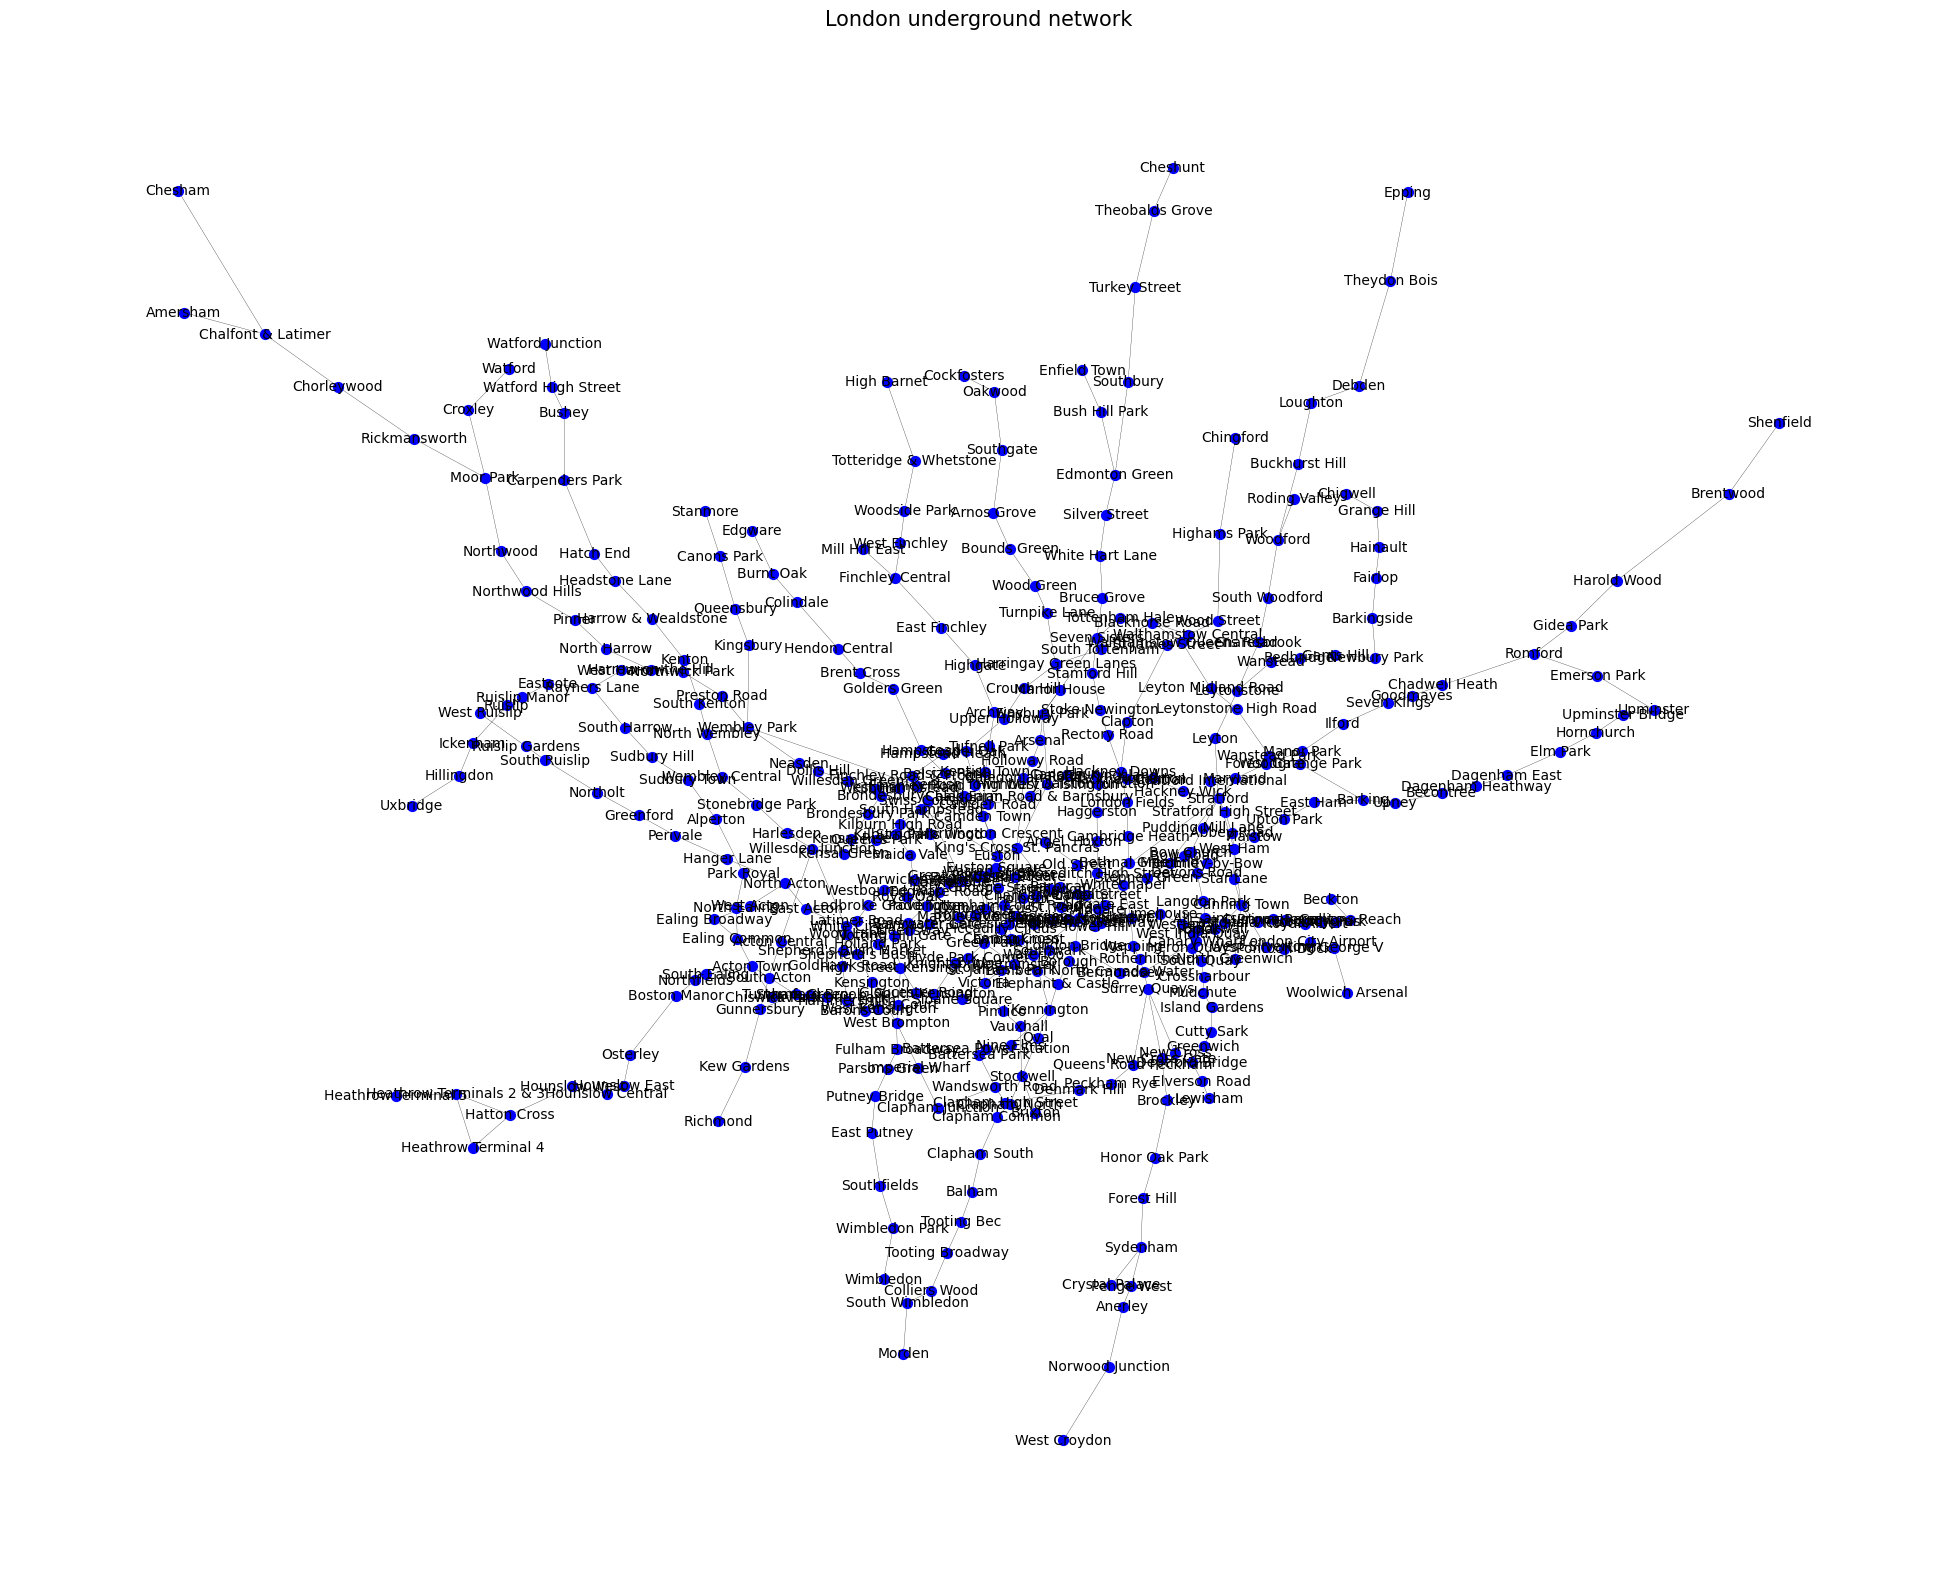

In [10]:
# We can plot the network with the names of the stations as labels
fig, ax = plt.subplots(figsize=(25,20))

pos = nx.get_node_attributes(G, 'coords')


nx.draw_networkx_nodes(G,pos,node_size=50,node_color='b')
nx.draw_networkx_edges(G,pos,arrows=False,width=0.2)
nx.draw_networkx_labels(G,pos,font_size=10, font_color='black')

plt.title("London underground network",fontsize=15)
plt.axis("off")
plt.show()

In [11]:
 #We can print the dataframe from the shapefile to check the data
df = nx.to_pandas_edgelist(G)
df[0:10]

,source,target,line_name,length,flows
0,Wembley Park,Kingsbury,Jubilee,2916.771558,12356
1,Wembley Park,Neasden,Jubilee,2353.165938,6744
2,Wembley Park,Preston Road,Metropolitan,1419.735166,36601
3,Wembley Park,Finchley Road,Metropolitan,7266.373927,55216
4,Kingsbury,Queensbury,Jubilee,1245.995234,9419
5,Queensbury,Canons Park,Jubilee,1693.307343,6385
6,Canons Park,Stanmore,Jubilee,1419.669476,3624
7,Stratford,West Ham,Jubilee,1673.509515,91801
8,Stratford,Mile End,Central,2805.001392,12010
9,Stratford,Leyton,Central,2131.342926,56082


## I. Topological network

### I.1. Centrality measures

- __Degree centrality__

In [12]:
#  We can calculate the degree centrality using networkx function:
deg_underground =nx.degree_centrality(G)

nx.set_node_attributes(G,dict(deg_underground),'degree')

df_deg = pd.DataFrame.from_dict(deg_underground,columns=['degree'],orient='index')
df_deg.sort_values(by='degree', ascending=False)[:10]

,degree
Stratford,0.0225
Bank and Monument,0.0200
King's Cross St. Pancras,0.0175
Baker Street,0.0175
Earl's Court,0.0150
Oxford Circus,0.0150
Liverpool Street,0.0150
Waterloo,0.0150
Green Park,0.0150
Canning Town,0.0150


- __Closeness centrality__

In [13]:
clos_underground=nx.closeness_centrality(G)

# Let us add the closeness centrality as attribute to the nodes in the graph
nx.set_node_attributes(G,clos_underground,'closeness')

df_clos = pd.DataFrame.from_dict(clos_underground,columns=['closeness'],orient='index')
df_clos.sort_values(by='closeness', ascending=False)[:10]

,closeness
Green Park,0.114778
Bank and Monument,0.113572
King's Cross St. Pancras,0.113443
Westminster,0.112549
Waterloo,0.112265
Oxford Circus,0.111204
Bond Street,0.110988
Farringdon,0.110742
Angel,0.110742
Moorgate,0.110314


- __Betweenness centrality__

In [14]:
#Let us compute the betweenness centrality for the network 
bet_underground=nx.betweenness_centrality(G)
nx.set_node_attributes(G,bet_underground,'betweenness')

df_bet = pd.DataFrame.from_dict(bet_underground,columns=['betweenness'],orient='index')
df_bet.sort_values(by='betweenness', ascending=False)[:10]

,betweenness
Stratford,0.297846
Bank and Monument,0.290489
Liverpool Street,0.270807
King's Cross St. Pancras,0.255307
Waterloo,0.243921
Green Park,0.215835
Euston,0.208324
Westminster,0.203335
Baker Street,0.191568
Finchley Road,0.165085


### I.2. Impact measures

- __Global Efficiency__

In [15]:
ef = nx.global_efficiency(G)
ef

0.1012561935972123

- __Network Connectivity__

size of largest component

In [16]:
largest_component = max(nx.connected_components(G), key=len)
Largest_subgraph = G.subgraph(largest_component)
# To coumpute the size of the largest component:
co = Largest_subgraph.number_of_nodes()
co

401

In [17]:
print(f"Is the graph connected? {nx.is_connected(G)}")
print(f"The size of the largest component: {Largest_subgraph.number_of_nodes()}")

Is the graph connected? True
The size of the largest component: 401


In [18]:
# number of connected components
nx.number_connected_components(G)

1

### I.3. Node removal

- __Degree Centrality__

In [19]:
deg_efficiency_non_sequential = []
deg_connectivity_non_sequential = []
deg_efficiency_sequential = []
deg_connectivity_sequential = []
deg_efficiency_non_sequential.append(ef)
deg_connectivity_non_sequential.append(co)
deg_efficiency_sequential.append(ef)
deg_connectivity_sequential.append(co)

A) Non-sequential removal 

In [20]:
G2=G.copy()

for n in list(df_deg.sort_values(by='degree', ascending=False)[:10].index):
    G2.remove_node(n)
    e=nx.global_efficiency(G2)
    largest_component = max(nx.connected_components(G2), key=len)
    Largest_subgraph = G2.subgraph(largest_component)
    c=Largest_subgraph.number_of_nodes()
    deg_efficiency_non_sequential.append(e)
    deg_connectivity_non_sequential.append(c)
    print(f"Remove {n}, {e}, {nx.is_connected(G2)}, The size of the largest component: {c}")

Remove Stratford, 0.08891736066510689, False, The size of the largest component: 379
Remove Bank and Monument, 0.08586164448742485, False, The size of the largest component: 378
Remove King's Cross St. Pancras, 0.08028700838265396, False, The size of the largest component: 377
Remove Baker Street, 0.07570039409751211, False, The size of the largest component: 374
Remove Earl's Court, 0.0740361229198828, False, The size of the largest component: 373
Remove Oxford Circus, 0.07274535237569829, False, The size of the largest component: 371
Remove Liverpool Street, 0.07094844226118287, False, The size of the largest component: 365
Remove Waterloo, 0.06898194318071488, False, The size of the largest component: 364
Remove Green Park, 0.06825731584971681, False, The size of the largest component: 363
Remove Canning Town, 0.06338447666647608, False, The size of the largest component: 349


B) Sequential removal

In [21]:
G2=G.copy()

for i in range(10):
    deg = nx.degree_centrality(G2)
    maxdeg = max(deg, key=deg.get)
    G2.remove_node(maxdeg)
    e=nx.global_efficiency(G2)
    largest_component = max(nx.connected_components(G2), key=len)
    Largest_subgraph = G2.subgraph(largest_component)
    c=Largest_subgraph.number_of_nodes()
    deg_efficiency_sequential.append(e)
    deg_connectivity_sequential.append(c)
    print(f"Remove {maxdeg}, {e}, {nx.is_connected(G2)}, The size of the largest component: {c}")

Remove Stratford, 0.08891736066510689, False, The size of the largest component: 379
Remove Bank and Monument, 0.08586164448742485, False, The size of the largest component: 378
Remove Baker Street, 0.08203328759057034, False, The size of the largest component: 377
Remove King's Cross St. Pancras, 0.07570039409751211, False, The size of the largest component: 374
Remove Canning Town, 0.07039592695635104, False, The size of the largest component: 360
Remove Green Park, 0.06940235301523284, False, The size of the largest component: 359
Remove Earl's Court, 0.0677717604548151, False, The size of the largest component: 358
Remove Waterloo, 0.06593580277595987, False, The size of the largest component: 357
Remove Oxford Circus, 0.06506900122239155, False, The size of the largest component: 355
Remove Willesden Junction, 0.056747518813518014, False, The size of the largest component: 341


Plot the results.

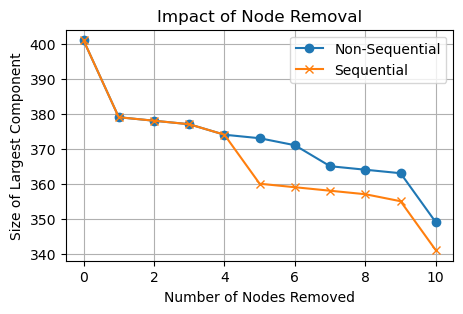

In [22]:
plt.figure(figsize=(5, 3))
plt.plot(deg_connectivity_non_sequential, label='Non-Sequential', marker='o')
plt.plot(deg_connectivity_sequential, label='Sequential', marker='x')
plt.xlabel('Number of Nodes Removed')
plt.ylabel('Size of Largest Component')
plt.title('Impact of Node Removal')
plt.legend()
plt.grid(True)
plt.show()

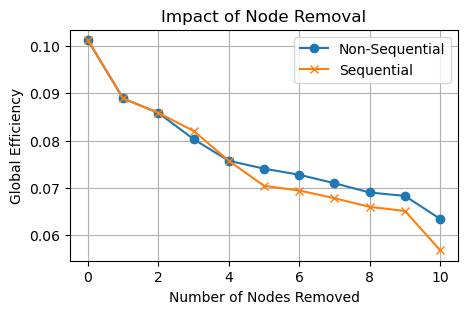

In [23]:
plt.figure(figsize=(5, 3))
plt.plot(deg_efficiency_non_sequential, label='Non-Sequential', marker='o')
plt.plot(deg_efficiency_sequential, label='Sequential', marker='x')
plt.xlabel('Number of Nodes Removed')
plt.ylabel('Global Efficiency')
plt.title('Impact of Node Removal')
plt.legend()
plt.grid(True)
plt.show()

- __Closeness Centrality__

In [24]:
clo_efficiency_non_sequential = []
clo_connectivity_non_sequential = []
clo_efficiency_sequential = []
clo_connectivity_sequential = []
clo_efficiency_non_sequential.append(ef)
clo_connectivity_non_sequential.append(co)
clo_efficiency_sequential.append(ef)
clo_connectivity_sequential.append(co)

A) Non-sequential removal 

In [25]:
G2=G.copy()

for n in list(df_clos.sort_values(by='closeness', ascending=False)[:10].index):
    G2.remove_node(n)
    e=nx.global_efficiency(G2)
    largest_component = max(nx.connected_components(G2), key=len)
    Largest_subgraph = G2.subgraph(largest_component)
    c=Largest_subgraph.number_of_nodes()
    clo_efficiency_non_sequential.append(e)
    clo_connectivity_non_sequential.append(c)
    print(f"Remove {n}, {e}, {nx.is_connected(G2)}, The size of the largest component: {c}")

Remove Green Park, 0.09918991960788402, True, The size of the largest component: 400
Remove Bank and Monument, 0.09487232544791133, True, The size of the largest component: 399
Remove King's Cross St. Pancras, 0.08793385149140875, True, The size of the largest component: 398
Remove Westminster, 0.08737164566976727, True, The size of the largest component: 397
Remove Waterloo, 0.08485943799789313, True, The size of the largest component: 396
Remove Oxford Circus, 0.08278135073141742, True, The size of the largest component: 395
Remove Bond Street, 0.08258086417012774, True, The size of the largest component: 394
Remove Farringdon, 0.08260040537396239, True, The size of the largest component: 393
Remove Angel, 0.08262233108950982, True, The size of the largest component: 392
Remove Moorgate, 0.08166991436767818, False, The size of the largest component: 389


B) Sequential removal

In [26]:
G2=G.copy()

for i in range(10):
    clos = nx.closeness_centrality(G2)
    maxclos = max(clos, key=clos.get)
    G2.remove_node(maxclos)
    e=nx.global_efficiency(G2)
    largest_component = max(nx.connected_components(G2), key=len)
    Largest_subgraph = G2.subgraph(largest_component)
    c=Largest_subgraph.number_of_nodes()
    clo_efficiency_sequential.append(e)
    clo_connectivity_sequential.append(c)
    print(f"Remove {maxclos}, {e}, {nx.is_connected(G2)}, The size of the largest component: {c}")

Remove Green Park, 0.09918991960788402, True, The size of the largest component: 400
Remove King's Cross St. Pancras, 0.09443475025566316, True, The size of the largest component: 399
Remove Waterloo, 0.09181648060183005, True, The size of the largest component: 398
Remove Bank and Monument, 0.08542563066911478, True, The size of the largest component: 397
Remove West Hampstead, 0.08054424756502003, True, The size of the largest component: 396
Remove Canada Water, 0.05810104159173278, False, The size of the largest component: 226
Remove Stratford, 0.051883620553389555, False, The size of the largest component: 226
Remove Earl's Court, 0.05035000093626794, False, The size of the largest component: 225
Remove Shepherd's Bush, 0.04439458727102797, False, The size of the largest component: 195
Remove Oxford Circus, 0.04295771061337044, False, The size of the largest component: 194


Plot the results.

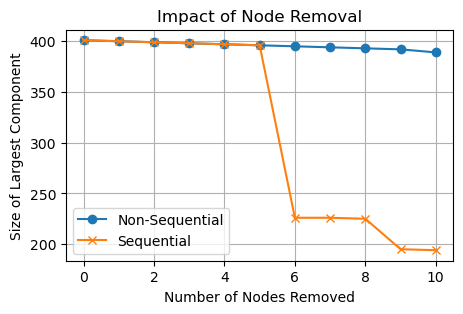

In [27]:
plt.figure(figsize=(5, 3))
plt.plot(clo_connectivity_non_sequential, label='Non-Sequential', marker='o')
plt.plot(clo_connectivity_sequential, label='Sequential', marker='x')
plt.xlabel('Number of Nodes Removed')
plt.ylabel('Size of Largest Component')
plt.title('Impact of Node Removal')
plt.legend()
plt.grid(True)
plt.show()

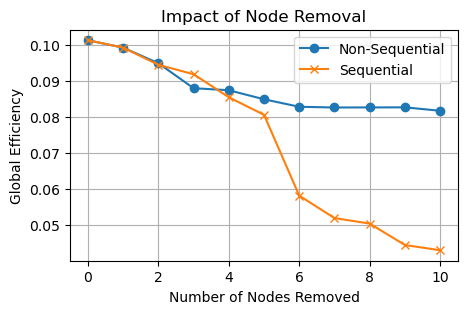

In [28]:
plt.figure(figsize=(5, 3))
plt.plot(clo_efficiency_non_sequential, label='Non-Sequential', marker='o')
plt.plot(clo_efficiency_sequential, label='Sequential', marker='x')
plt.xlabel('Number of Nodes Removed')
plt.ylabel('Global Efficiency')
plt.title('Impact of Node Removal')
plt.legend()
plt.grid(True)
plt.show()

- __Betweenness Centrality__

In [29]:
bet_efficiency_non_sequential = []
bet_connectivity_non_sequential = []
bet_efficiency_sequential = []
bet_connectivity_sequential = []
bet_efficiency_non_sequential.append(ef)
bet_connectivity_non_sequential.append(co)
bet_efficiency_sequential.append(ef)
bet_connectivity_sequential.append(co)

A) Non-sequential removal 

In [30]:
G2=G.copy()

for n in list(df_bet.sort_values(by='betweenness', ascending=False)[:10].index):
    G2.remove_node(n)
    e=nx.global_efficiency(G2)
    largest_component = max(nx.connected_components(G2), key=len)
    Largest_subgraph = G2.subgraph(largest_component)
    c=Largest_subgraph.number_of_nodes()
    bet_efficiency_non_sequential.append(e)
    bet_connectivity_non_sequential.append(c)
    print(f"Remove {n}, {e}, {nx.is_connected(G2)}, The size of the largest component: {c}")

Remove Stratford, 0.08891736066510689, False, The size of the largest component: 379
Remove Bank and Monument, 0.08586164448742485, False, The size of the largest component: 378
Remove Liverpool Street, 0.08496349266423939, False, The size of the largest component: 377
Remove King's Cross St. Pancras, 0.07849775440713821, False, The size of the largest component: 371
Remove Waterloo, 0.07594226578366223, False, The size of the largest component: 370
Remove Green Park, 0.07415154167648695, False, The size of the largest component: 369
Remove Euston, 0.06820564659789057, False, The size of the largest component: 346
Remove Westminster, 0.06765950327361094, False, The size of the largest component: 345
Remove Baker Street, 0.064700058053009, False, The size of the largest component: 342
Remove Finchley Road, 0.06313903700825897, False, The size of the largest component: 339


B) Sequential removal

In [31]:
G2=G.copy()

for i in range(10):
    bet = nx.betweenness_centrality(G2)
    maxbet = max(bet, key=bet.get)
    G2.remove_node(maxbet)
    e=nx.global_efficiency(G2)
    largest_component = max(nx.connected_components(G2), key=len)
    Largest_subgraph = G2.subgraph(largest_component)
    c=Largest_subgraph.number_of_nodes()
    bet_efficiency_sequential.append(e)
    bet_connectivity_sequential.append(c)
    print(f"Remove {maxbet}, {e}, {nx.is_connected(G2)}, The size of the largest component: {c}")

Remove Stratford, 0.08891736066510689, False, The size of the largest component: 379
Remove King's Cross St. Pancras, 0.08460293133575152, False, The size of the largest component: 378
Remove Waterloo, 0.08182895253292936, False, The size of the largest component: 377
Remove Bank and Monument, 0.07767794342812263, False, The size of the largest component: 376
Remove Canada Water, 0.07283234083472483, False, The size of the largest component: 375
Remove West Hampstead, 0.053210203984026455, False, The size of the largest component: 227
Remove Earl's Court, 0.05165629952389727, False, The size of the largest component: 226
Remove Shepherd's Bush, 0.0458442134055722, False, The size of the largest component: 196
Remove Euston, 0.04163076968121037, False, The size of the largest component: 173
Remove Baker Street, 0.0381637040943985, False, The size of the largest component: 170


Plot the results.

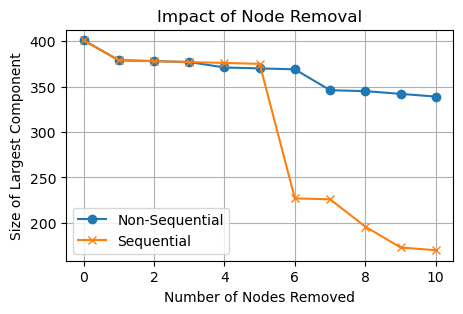

In [32]:
plt.figure(figsize=(5, 3))
plt.plot(bet_connectivity_non_sequential, label='Non-Sequential', marker='o')
plt.plot(bet_connectivity_sequential, label='Sequential', marker='x')
plt.xlabel('Number of Nodes Removed')
plt.ylabel('Size of Largest Component')
plt.title('Impact of Node Removal')
plt.legend()
plt.grid(True)
plt.show()

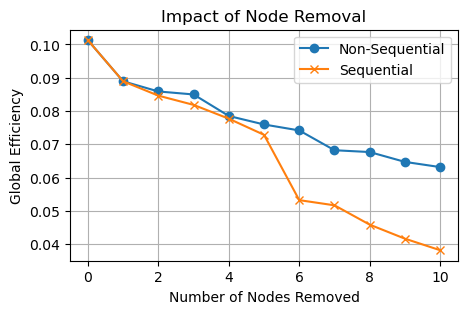

In [33]:
plt.figure(figsize=(5, 3))
plt.plot(bet_efficiency_non_sequential, label='Non-Sequential', marker='o')
plt.plot(bet_efficiency_sequential, label='Sequential', marker='x')
plt.xlabel('Number of Nodes Removed')
plt.ylabel('Global Efficiency')
plt.title('Impact of Node Removal')
plt.legend()
plt.grid(True)
plt.show()

## II. Flows: weighted network

### II.1. Centrality measures

In [34]:
# Note that we have to invert the flows
v_weights={(e1, e2):round(1./(weight+1),7) for e1, e2, weight in G.edges(data='flows')}

# Let us add the inverted weight as an attribute to the edges in the graph
nx.set_edge_attributes(G, v_weights, 'v_weights')

# Print edge list with attributes
list(G.edges(data = True))[0]

('Wembley Park',
 'Kingsbury',
 {'length': 2916.7715580506483,
  'line_name': 'Jubilee',
  'flows': 12356,
  'v_weights': 8.09e-05})

- __Closeness centrality__

In [35]:
clos_w=nx.closeness_centrality(G, distance='v_weights')

# Let us add the closeness centrality as attribute to the nodes in the graph
nx.set_node_attributes(G,clos_w,'closeness_w')

df_clos_w = pd.DataFrame.from_dict(clos_w,columns=['closeness_w'],orient='index')
df_clos_w.sort_values(by='closeness_w', ascending=False)[:10]

,closeness_w
Green Park,95.964945
Westminster,95.956683
Waterloo,95.949165
Bank and Monument,95.943794
Oxford Circus,95.929042
Bond Street,95.924165
Victoria,95.912796
Liverpool Street,95.911745
Warren Street,95.885946
Moorgate,95.877709


- __Betweenness centrality__

In [36]:
bet_w=nx.betweenness_centrality(G, weight='v_weights')

# Let us add the closeness centrality as attribute to the nodes in the graph
nx.set_node_attributes(G,bet_w,'bet_w')

df_bet_w=pd.DataFrame.from_dict(bet_w,columns=['bet_w'],orient='index')
df_bet_w.sort_values(by='bet_w', ascending=False)[:10]

,bet_w
Green Park,0.572556
Bank and Monument,0.505288
Waterloo,0.416429
Westminster,0.381366
Liverpool Street,0.336817
Stratford,0.331291
Bond Street,0.291830
Euston,0.284236
Oxford Circus,0.270764
Warren Street,0.254286


### II.2. Impact measures

In [37]:
def weighted_global_efficiency(G):
    n = len(G)
    sum_efficiency = 0.0
    for source in G:
        path_length = nx.single_source_dijkstra_path_length(G, source, weight='v_weights')
        sum_efficiency += sum(1 / d for target, d in path_length.items() if source != target)
    return sum_efficiency / (n * (n - 1))

efficiency = weighted_global_efficiency(G)
efficiency

2649.2777279412157

In [38]:
def passenger_affected(G, node):
    n = sum(data['flows'] for _, _, data in G.edges(node, data=True))
    return n

### II.3. Node removal

In [39]:
for n in list(df_bet_w.sort_values(by='bet_w', ascending=False)[:3].index):
    G2=G.copy()
    G2.remove_node(n)
    e=weighted_global_efficiency(G2)
    p=passenger_affected(G, n)
    print(f"Remove {n}, {e}, {p}")

Remove Green Park, 2387.9650374865896, 628642
Remove Bank and Monument, 2393.861992956435, 618193
Remove Waterloo, 2425.785502504781, 588394
